# 𝙏𝙞𝙩𝙖𝙣𝙞𝙘 𝙎𝙪𝙧𝙫𝙞𝙫𝙖𝙡 𝙋𝙧𝙚𝙙𝙞𝙘𝙩𝙞𝙤𝙣

CodSoft Data Science Internship 
Task: 01

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Data

In [2]:
data = pd.read_csv('C:/Users/sam/Desktop/dataset.csv')

In [3]:
data.shape

(418, 12)

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
data.describe(include=object).T

,count,unique,top,freq
Name,418,418,"Kelly, Mr. James",1
Sex,418,2,male,266
Ticket,418,363,PC 17608,5
Cabin,91,76,B57 B59 B63 B66,3
Embarked,418,3,S,270


### Pre-Processing

In [9]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

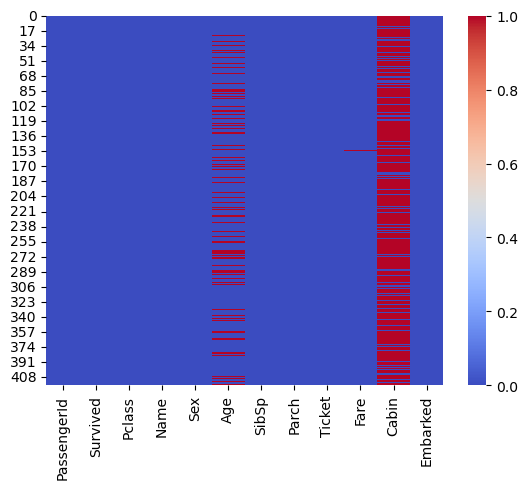

In [10]:
#null vaules in age and cabin
sns.heatmap(data.isnull(), cmap='coolwarm')
plt.show()

<Axes: >

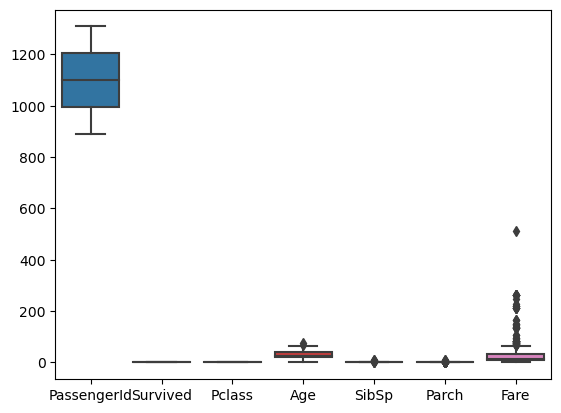

In [11]:
sns.boxplot(data)

In [12]:
data['PassengerId'].duplicated().sum()

0

In [13]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
num_data=[]
object_data=[]

for column in data.columns:
    if data.dtypes[column] != 'object':
        num_data.append(column)
    else:
        object_data.append(column)

In [15]:
#numerical data seprate from our data set 
num_data

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [16]:
#object data seprate from our data set
object_data

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [17]:
data[num_data]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,892,0,3,34.5,0,0,7.8292
1,893,1,3,47.0,1,0,7.0000
2,894,0,2,62.0,0,0,9.6875
3,895,0,3,27.0,0,0,8.6625
4,896,1,3,22.0,1,1,12.2875
...,...,...,...,...,...,...,...
413,1305,0,3,NaN,0,0,8.0500
414,1306,1,1,39.0,0,0,108.9000
415,1307,0,3,38.5,0,0,7.2500
416,1308,0,3,NaN,0,0,8.0500


In [18]:
#KNNImputer is a technique to fill the missing values in our data set by cheching nearest result
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=4)

In [19]:
data[num_data]= imputer.fit_transform(data[num_data])

In [20]:
data[num_data]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,892.0,0.0,3.0,34.500,0.0,0.0,7.8292
1,893.0,1.0,3.0,47.000,1.0,0.0,7.0000
2,894.0,0.0,2.0,62.000,0.0,0.0,9.6875
3,895.0,0.0,3.0,27.000,0.0,0.0,8.6625
4,896.0,1.0,3.0,22.000,1.0,1.0,12.2875
...,...,...,...,...,...,...,...
413,1305.0,0.0,3.0,23.125,0.0,0.0,8.0500
414,1306.0,1.0,1.0,39.000,0.0,0.0,108.9000
415,1307.0,0.0,3.0,38.500,0.0,0.0,7.2500
416,1308.0,0.0,3.0,23.125,0.0,0.0,8.0500


In [21]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [22]:
#for filling missing data in our Cabin column which is object type data

for column in data.columns:
    missing_indices = data[data[column].isnull()].index
    available_values = data[column].dropna()
    for index in missing_indices:
        random_choice = np.random.choice(available_values)
        data.at[index, column] = random_choice

In [23]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Remove the outliers in boxplot

<Axes: ylabel='Fare'>

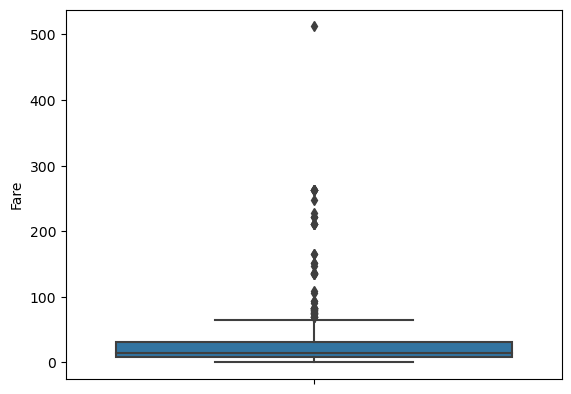

In [24]:
sns.boxplot(data=data,y='Fare')

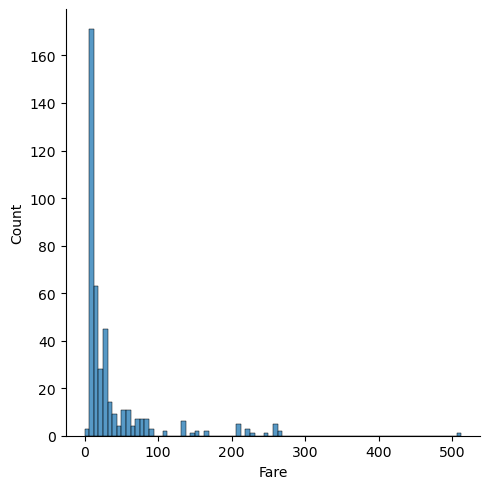

In [25]:
sns.displot(data['Fare'])
plt.show()

C:\Users\sam\AppData\Local\Temp\ipykernel_4448\2686491720.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Fare'])


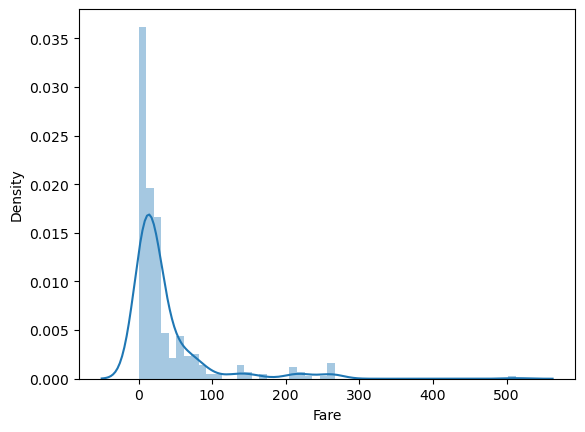

In [26]:
sns.distplot(data['Fare'])
plt.show()

In [27]:
# Use the function to remove outliers from the 'Fare' column

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_no_outliers


data = remove_outliers_iqr(data, 'Fare')

C:\Users\sam\AppData\Local\Temp\ipykernel_4448\2686491720.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Fare'])


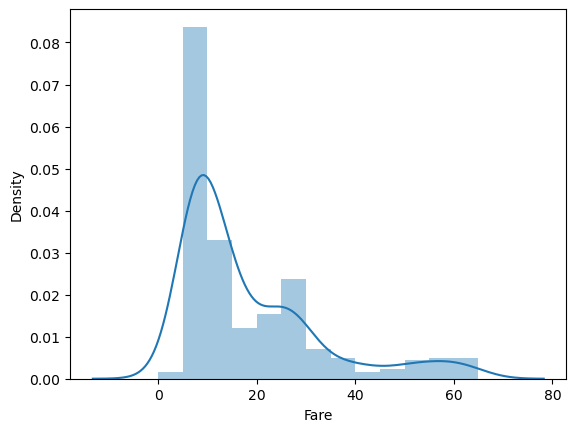

In [28]:
sns.distplot(data['Fare'])
plt.show()

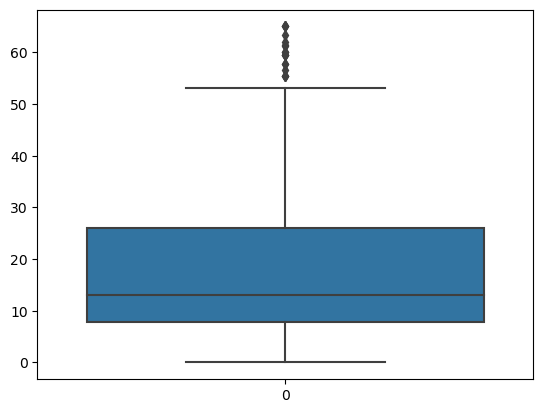

In [29]:
sns.boxplot(data['Fare'])
plt.show()

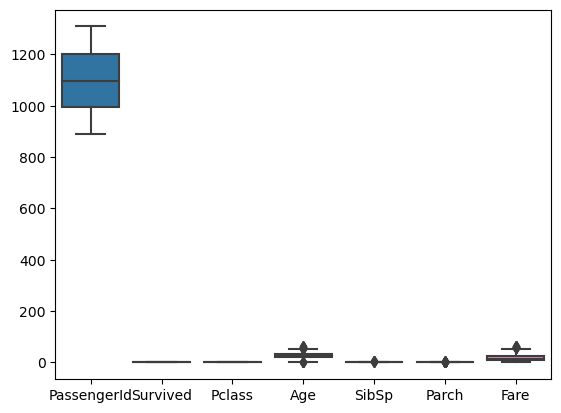

In [30]:
sns.boxplot(data)
plt.show()

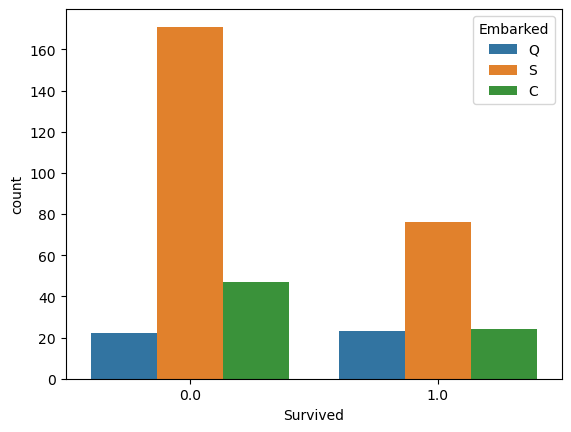

In [31]:
sns.countplot( x='Survived', data=data, hue="Embarked");

In [32]:
data['Survived'].value_counts()

0.0    240
1.0    123
Name: Survived, dtype: int64

In [33]:
#Embarked means go on board a ship
#C = Cherbourg, Q = Queenstown, S = Southampton
data["Embarked"].value_counts()

S    247
C     71
Q     45
Name: Embarked, dtype: int64

In [34]:
data["Embarked"]=data["Embarked"].replace("S",0)
data["Embarked"]=data["Embarked"].replace("C",1)
data["Embarked"]=data["Embarked"].replace("Q",2)
data["Embarked"].value_counts()

0    247
1     71
2     45
Name: Embarked, dtype: int64

In [35]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892.0,0.0,3.0,"Kelly, Mr. James",male,34.5,0.0,0.0,330911,7.8292,C23 C25 C27,2
1,893.0,1.0,3.0,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1.0,0.0,363272,7.0000,B61,0
2,894.0,0.0,2.0,"Myles, Mr. Thomas Francis",male,62.0,0.0,0.0,240276,9.6875,B51 B53 B55,2
3,895.0,0.0,3.0,"Wirz, Mr. Albert",male,27.0,0.0,0.0,315154,8.6625,E52,0
4,896.0,1.0,3.0,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1.0,1.0,3101298,12.2875,B51 B53 B55,0
5,897.0,0.0,3.0,"Svensson, Mr. Johan Cervin",male,14.0,0.0,0.0,7538,9.2250,F E57,0
6,898.0,1.0,3.0,"Connolly, Miss. Kate",female,30.0,0.0,0.0,330972,7.6292,C31,2
7,899.0,0.0,2.0,"Caldwell, Mr. Albert Francis",male,26.0,1.0,1.0,248738,29.0000,B57 B59 B63 B66,0
8,900.0,1.0,3.0,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0.0,0.0,2657,7.2292,D30,1
9,901.0,0.0,3.0,"Davies, Mr. John Samuel",male,21.0,2.0,0.0,A/4 48871,24.1500,D28,0


In [36]:
data['Sex'].value_counts()

male      240
female    123
Name: Sex, dtype: int64

In [37]:
data['Sex']= data['Sex'].replace('male',0)
data['Sex']= data['Sex'].replace('female',1)
data['Sex'].value_counts()

0    240
1    123
Name: Sex, dtype: int64

In [38]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892.0,0.0,3.0,"Kelly, Mr. James",0,34.5,0.0,0.0,330911,7.8292,A21,2
1,893.0,1.0,3.0,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1.0,0.0,363272,7.0000,C89,0
2,894.0,0.0,2.0,"Myles, Mr. Thomas Francis",0,62.0,0.0,0.0,240276,9.6875,A29,2
3,895.0,0.0,3.0,"Wirz, Mr. Albert",0,27.0,0.0,0.0,315154,8.6625,C116,0
4,896.0,1.0,3.0,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1.0,1.0,3101298,12.2875,F E46,0
5,897.0,0.0,3.0,"Svensson, Mr. Johan Cervin",0,14.0,0.0,0.0,7538,9.2250,D34,0
6,898.0,1.0,3.0,"Connolly, Miss. Kate",1,30.0,0.0,0.0,330972,7.6292,B10,2
7,899.0,0.0,2.0,"Caldwell, Mr. Albert Francis",0,26.0,1.0,1.0,248738,29.0000,B57 B59 B63 B66,0
8,900.0,1.0,3.0,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.0,0.0,0.0,2657,7.2292,C54,1
9,901.0,0.0,3.0,"Davies, Mr. John Samuel",0,21.0,2.0,0.0,A/4 48871,24.1500,B69,0


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  363 non-null    float64
 1   Survived     363 non-null    float64
 2   Pclass       363 non-null    float64
 3   Name         363 non-null    object 
 4   Sex          363 non-null    int64  
 5   Age          363 non-null    float64
 6   SibSp        363 non-null    float64
 7   Parch        363 non-null    float64
 8   Ticket       363 non-null    object 
 9   Fare         363 non-null    float64
 10  Cabin        363 non-null    object 
 11  Embarked     363 non-null    int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 45.0+ KB


In [40]:
data["Embarked"] = data["Embarked"].astype("int64")
data["Sex"] = data["Sex"].astype("int64")
data["PassengerId"] = data["PassengerId"].astype("int64")
data["Pclass"] = data["Pclass"].astype("int64")
data["Age"] = data["Age"].astype("int64")
data["SibSp"] = data["SibSp"].astype("int64")
data["Parch"] = data["Parch"].astype("int64")

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  363 non-null    int64  
 1   Survived     363 non-null    float64
 2   Pclass       363 non-null    int64  
 3   Name         363 non-null    object 
 4   Sex          363 non-null    int64  
 5   Age          363 non-null    int64  
 6   SibSp        363 non-null    int64  
 7   Parch        363 non-null    int64  
 8   Ticket       363 non-null    object 
 9   Fare         363 non-null    float64
 10  Cabin        363 non-null    object 
 11  Embarked     363 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 45.0+ KB


# Encoding

In [42]:
#This code converts data columns to categorical type and encodes them as numerical categories.

data = data.apply(lambda x: x.astype('category').cat.codes)

In [43]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,0,2,177,0,33,0,0,137,24,2,2
1,1,1,2,349,1,46,1,0,205,5,44,0
2,2,0,1,237,0,58,0,0,59,41,3,2
3,3,0,2,353,0,26,0,0,132,34,24,0
4,4,1,2,150,1,21,1,1,123,46,67,0
5,5,0,2,317,0,13,0,0,244,37,53,0
6,6,1,2,70,1,29,0,0,143,14,6,2
7,7,0,1,50,0,25,1,1,69,101,15,0
8,8,1,2,4,1,17,0,0,85,8,36,1
9,9,0,2,87,0,20,2,0,252,90,18,0


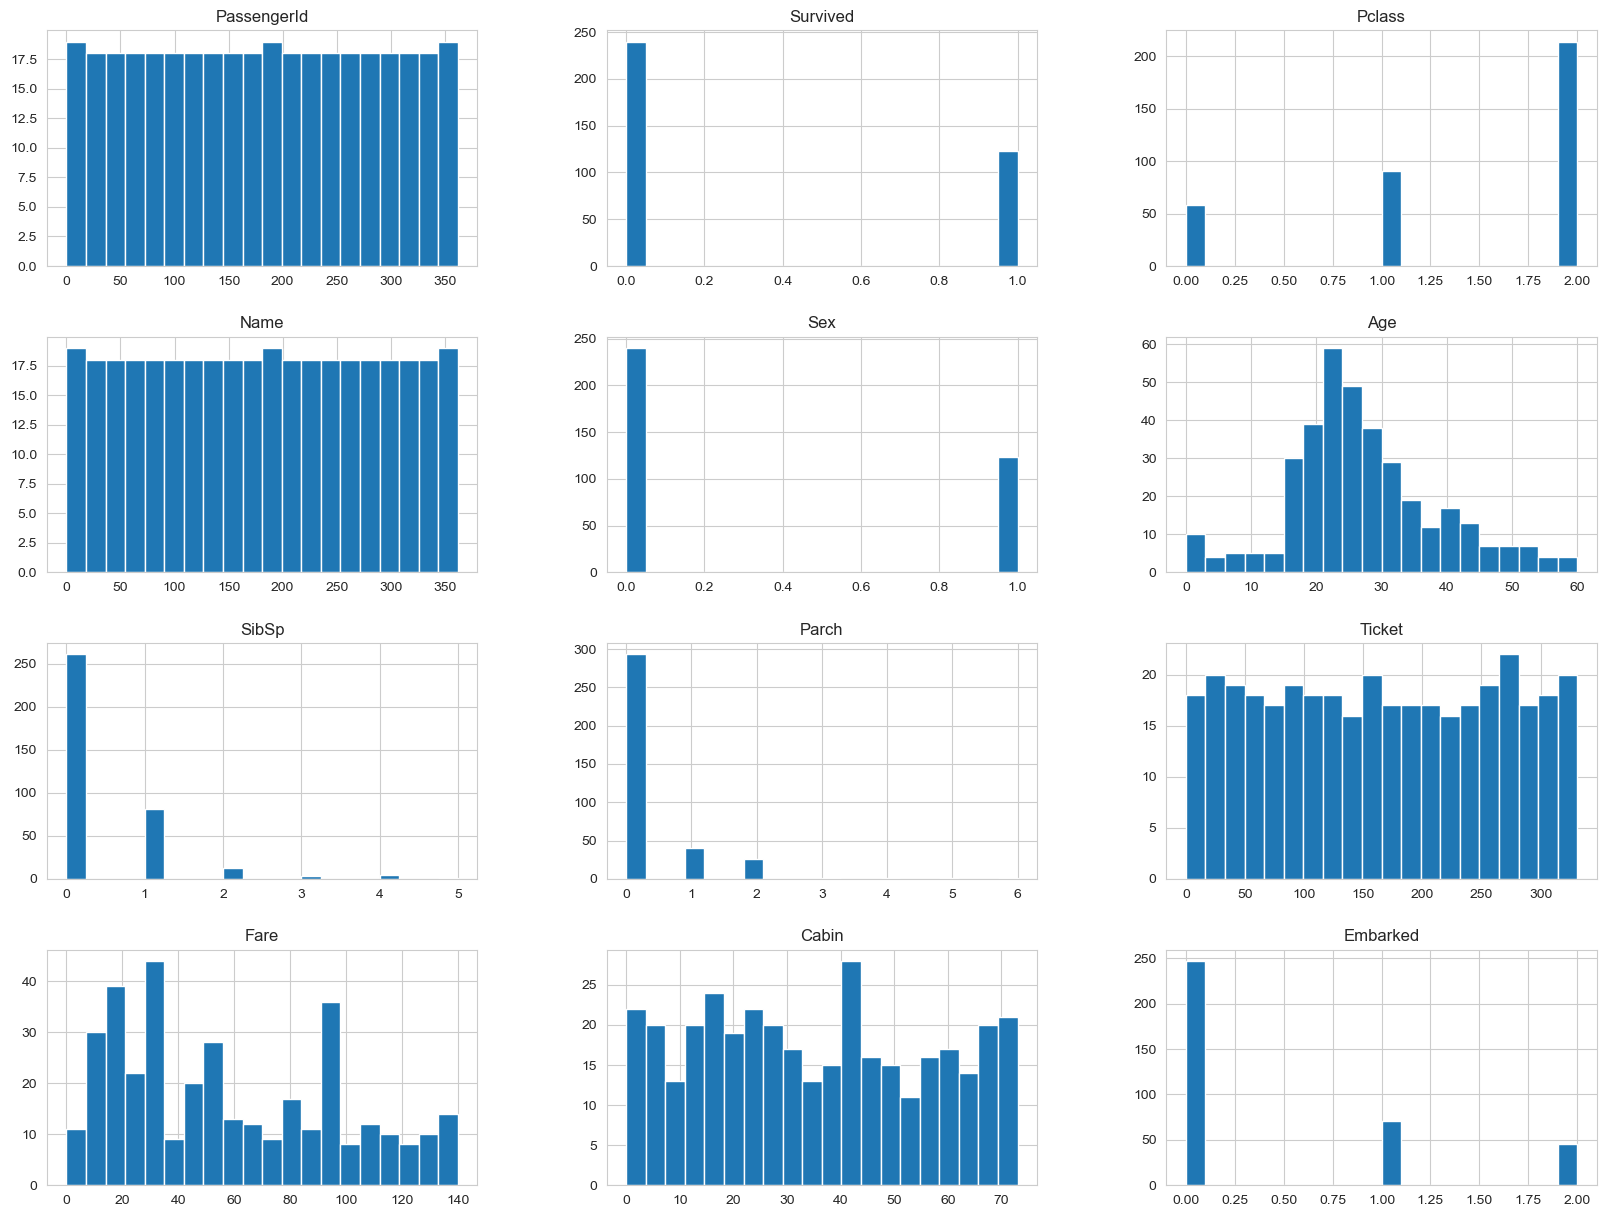

In [44]:
sns.set_style("whitegrid")
data.hist(bins=20 ,figsize=(20, 15))
plt.show()

In [45]:
#Spliting Dataset 
X = data.drop(['Survived','Name','Cabin','Ticket'],axis=1)

#the axis=1 parameter specifies that you want to drop columns features from the DataFrame 
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,0,33,0,0,24,2
1,1,2,1,46,1,0,5,0
2,2,1,0,58,0,0,41,2
3,3,2,0,26,0,0,34,0
4,4,2,1,21,1,1,46,0


In [46]:
y = data['Survived']

In [47]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int8

In [48]:
#Scaling
#used for standardizing (scaling) numerical features in machine learning datasets.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [49]:
X=sc.fit_transform(X)

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test, = train_test_split(X,y, test_size=0.2, random_state=42)

# Modeling

#### 1. Linear Regression

In [52]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [53]:
model.fit(X,y)

LinearRegression()

In [54]:
print(f"Coefficient: {model.coef_}")
print(f"Intercept: {model.intercept_}")

Coefficient: [-6.99259159e-17  2.77555756e-17  4.73316399e-01  9.71445147e-17
 -2.41126563e-16 -3.36536354e-16  3.78169718e-16  1.17961196e-16]
Intercept: 0.3388429752066115


In [55]:
y_pred = model.predict(X_test)
y_pred

array([ 1.00000000e+00, -5.55111512e-17,  6.10622664e-16,  1.00000000e+00,
       -1.66533454e-16,  7.21644966e-16,  1.00000000e+00,  1.00000000e+00,
       -5.55111512e-17, -2.05391260e-15, -1.11022302e-16,  7.77156117e-16,
        1.00000000e+00,  0.00000000e+00,  1.00000000e+00,  1.00000000e+00,
       -5.55111512e-17, -2.77555756e-16,  1.00000000e+00,  1.00000000e+00,
       -5.55111512e-17,  1.00000000e+00,  7.21644966e-16,  1.00000000e+00,
       -2.77555756e-16,  1.00000000e+00,  1.00000000e+00,  2.77555756e-16,
        1.00000000e+00, -1.66533454e-16,  0.00000000e+00, -1.11022302e-16,
        1.00000000e+00,  1.00000000e+00, -1.66533454e-16,  1.00000000e+00,
        1.00000000e+00,  7.21644966e-16, -1.11022302e-16, -3.88578059e-16,
        1.00000000e+00, -1.66533454e-16,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00, -2.77555756e-16,  2.77555756e-16,  3.33066907e-16,
        0.00000000e+00,  3.33066907e-16,  2.22044605e-16,  1.00000000e+00,
       -2.22044605e-16,  

In [56]:
df=pd.DataFrame({"y_predect":y_pred,"y_test":y_test})
df

,y_predect,y_test
182,1.000000e+00,1
35,-5.551115e-17,0
16,6.106227e-16,0
350,1.000000e+00,1
62,-1.665335e-16,0
...,...,...
339,-1.110223e-16,0
92,1.000000e+00,1
105,6.106227e-16,0
392,-6.661338e-16,0


In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r_squared = r2_score(y_test, y_pred)

print("Regression Report:")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-Squared: {r_squared}")

Regression Report:
Mean Absolute Error: 3.931406189939767e-16
Mean Squared Error: 3.0971064113904985e-31
Root Mean Squared Error: 5.565165236891443e-16
R-Squared: 1.0


#### 2. Random Forest 

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
modelRF = RandomForestClassifier(n_estimators=100, random_state=42)  
modelRF.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [60]:
y_pred=modelRF.predict(X_test)

In [61]:
df=pd.DataFrame({"y_predect":y_pred,"y_test":y_test})
df

,y_predect,y_test
182,1,1
35,0,0
16,0,0
350,1,1
62,0,0
...,...,...
339,0,0
92,1,1
105,0,0
392,0,0


In [62]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        32

    accuracy                           1.00        73
   macro avg       1.00      1.00      1.00        73
weighted avg       1.00      1.00      1.00        73



In [63]:
from sklearn.tree import DecisionTreeClassifier
modelTree = DecisionTreeClassifier()

In [64]:
modelTree.fit(X_train, y_train)
y_pred = modelTree.predict(X_test)

In [65]:
df=pd.DataFrame({"y_predect":y_pred,"y_test":y_test})
df

,y_predect,y_test
182,1,1
35,0,0
16,0,0
350,1,1
62,0,0
...,...,...
339,0,0
92,1,1
105,0,0
392,0,0


In [66]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        32

    accuracy                           1.00        73
   macro avg       1.00      1.00      1.00        73
weighted avg       1.00      1.00      1.00        73



#### 4. XGBoost

In [67]:
#pip install xgboost

In [68]:
import xgboost as xgb
print(xgb.__version__)
print ("Xgboost has been imported successfully.")

2.0.0
Xgboost has been imported successfully.


In [69]:
import xgboost as xgb

In [70]:
xgboost = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)

In [71]:
xgboost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

In [72]:
y_pred = xgboost.predict(X_test)

In [73]:
df=pd.DataFrame({"y_predect":y_pred,"y_test":y_test})
df

,y_predect,y_test
182,1,1
35,0,0
16,0,0
350,1,1
62,0,0
...,...,...
339,0,0
92,1,1
105,0,0
392,0,0


In [74]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        32

    accuracy                           1.00        73
   macro avg       1.00      1.00      1.00        73
weighted avg       1.00      1.00      1.00        73

